In [2]:
from numba import jit, njit
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import kwant.kpm


import scipy
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

import cmath

from qutip import *
from joblib import Parallel, delayed

def corr_dis(L, W, a, xic):
    Nx = int(L/a)
    Ny = int(W/a)
    Vxy = np.random.normal(0, 1., size=(Ny, Nx))/(a) + 1j*0.0
    
    kkVxy = np.fft.fft2(Vxy)
    kx = 2*np.pi * np.fft.fftfreq(kkVxy.shape[1],d=a)
    ky = 2*np.pi * np.fft.fftfreq(kkVxy.shape[0],d=a)
    kx, ky = np.meshgrid(kx,ky)
    
    kVxy = np.multiply(kkVxy, np.exp( - .125 * xic**2. * (kx**2.+ky**2.)  ) ) * xic/np.sqrt(2.)
    
    Vxy = np.fft.ifft2(kVxy)
    Vxy = Vxy - np.sum(Vxy)/(1.*Nx*Ny)

    return Vxy

def v_img_singleside(W, N, min_l):
    arr_x = np.linspace(min_l, W+min_l, N)
    arr_V = - 1./(np.abs( arr_x ))
    return arr_V

def v_expcutoff_img_singleside(W, N, min_l, xiV):
    arr_x = np.linspace(min_l, W+min_l, N)
    arr_V = - 1./(np.abs( arr_x ))*np.exp( -(arr_x-min_l)**2/(2*xiV**2) )
    #arr_V = - 1./(np.abs( arr_x )) /( np.exp( (arr_x-min_l - xiV)/(.01*xiV) ) + 1 )
    return arr_V

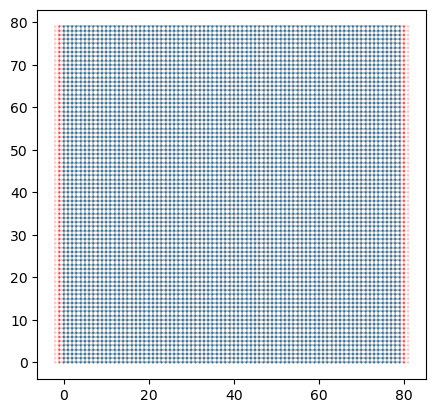

/opt/anaconda3/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "
/opt/anaconda3/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "
/opt/anaconda3/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "
/opt/anaconda3/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "
/var

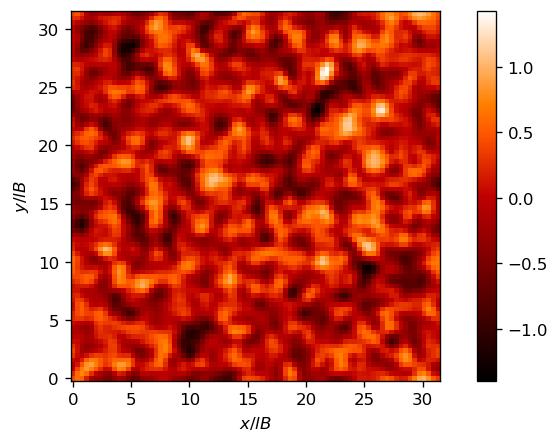

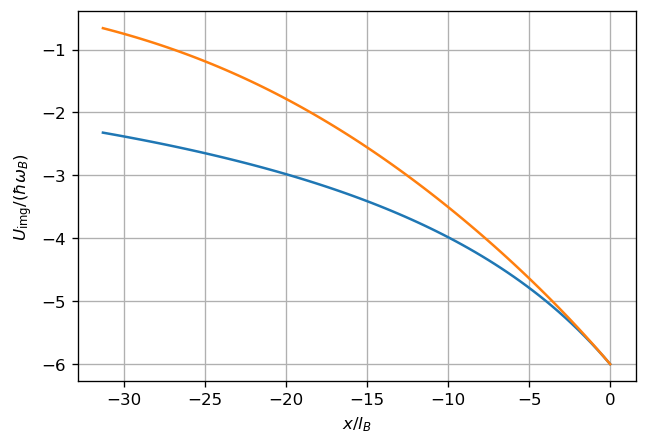

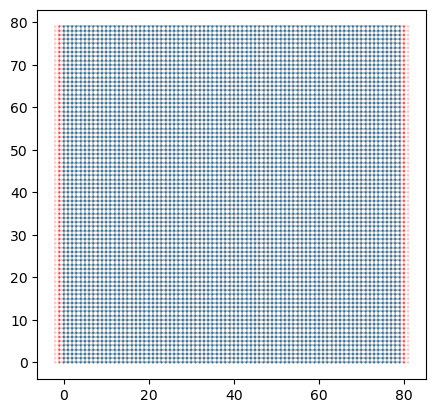

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

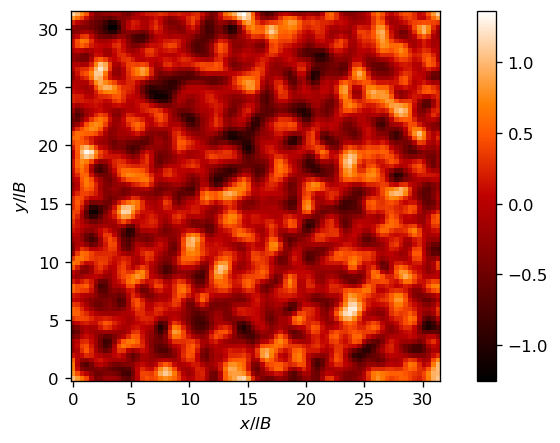

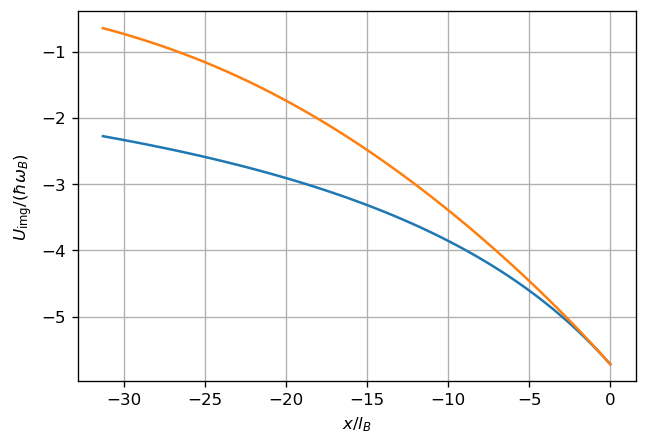

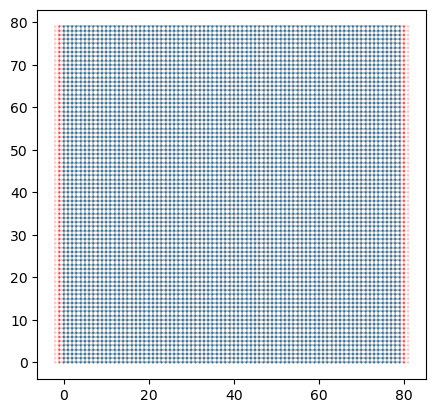

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

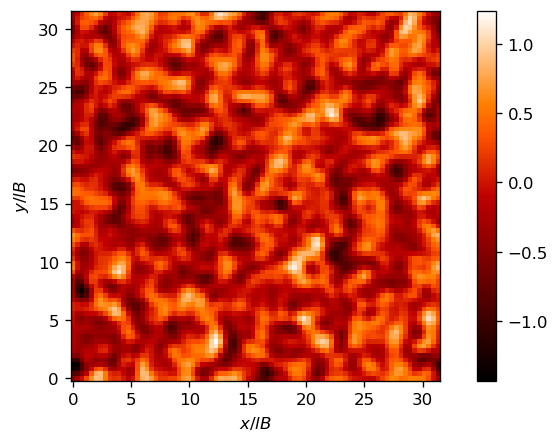

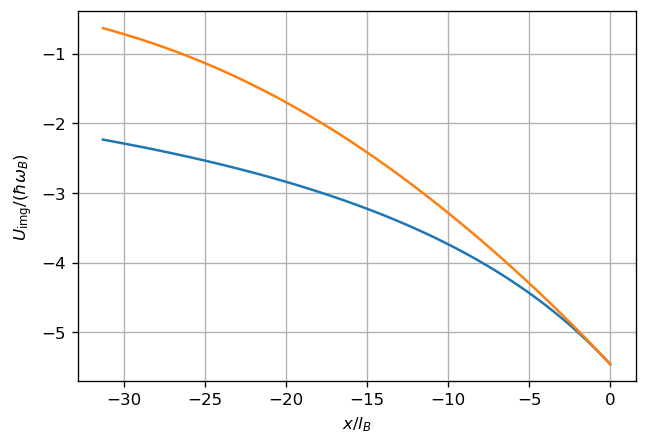

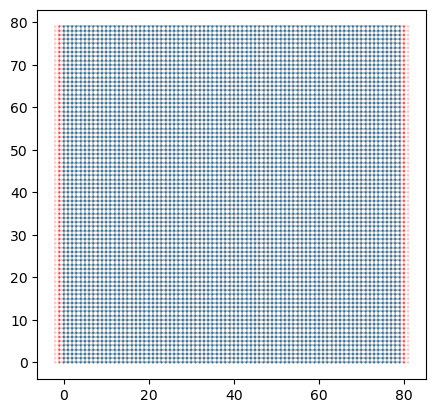

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

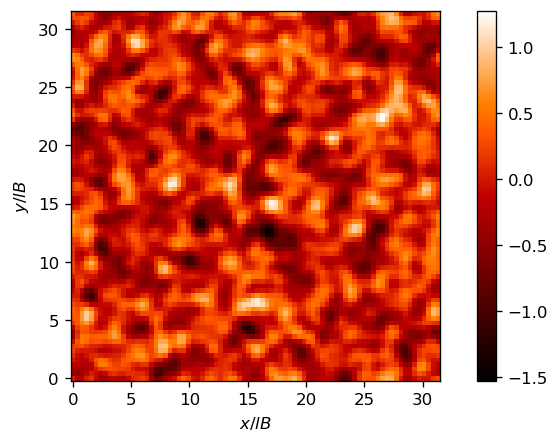

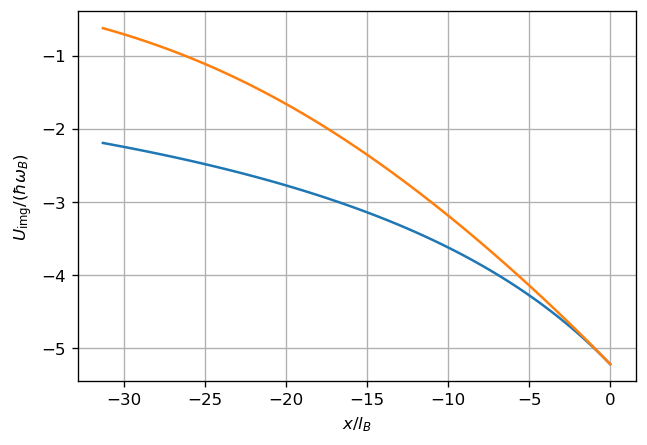

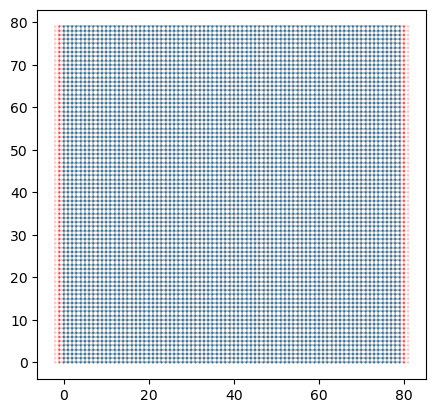

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

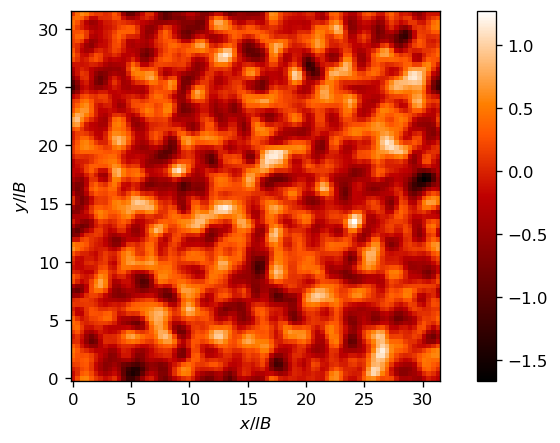

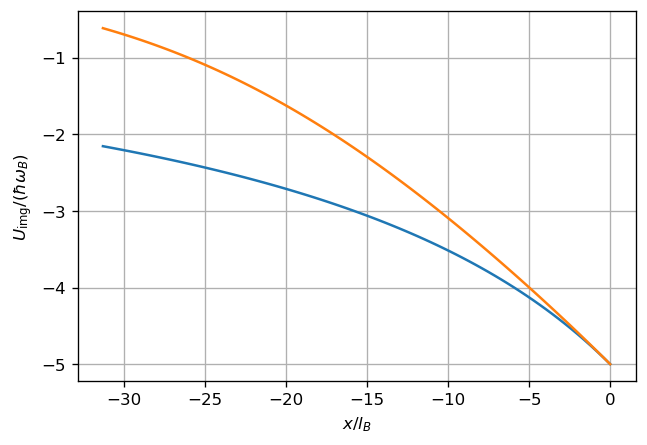

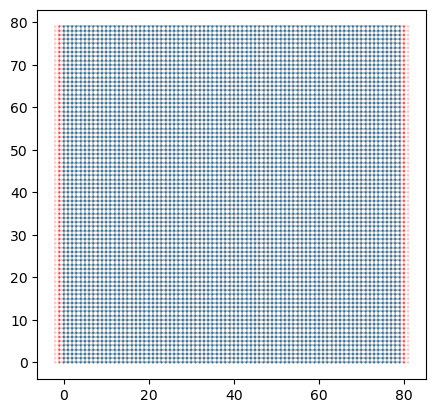

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

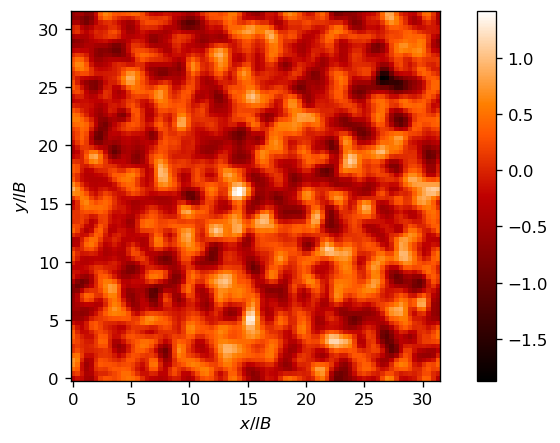

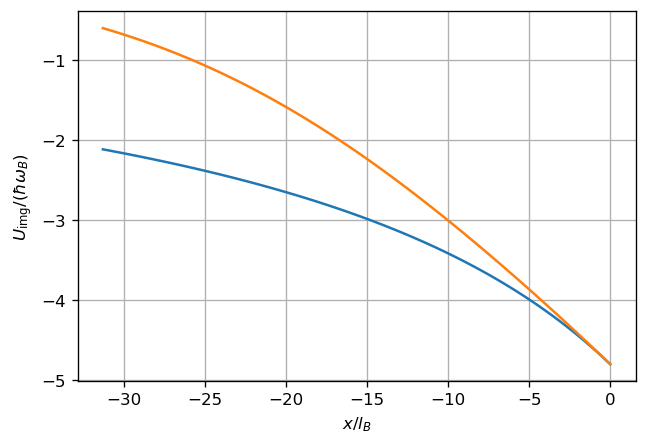

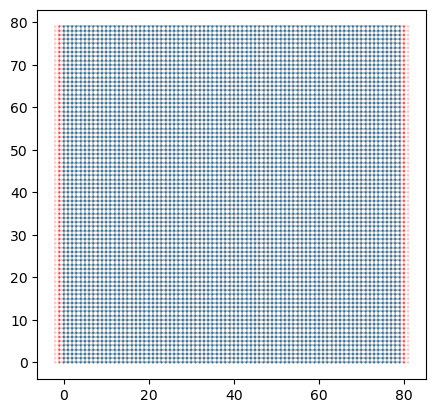

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

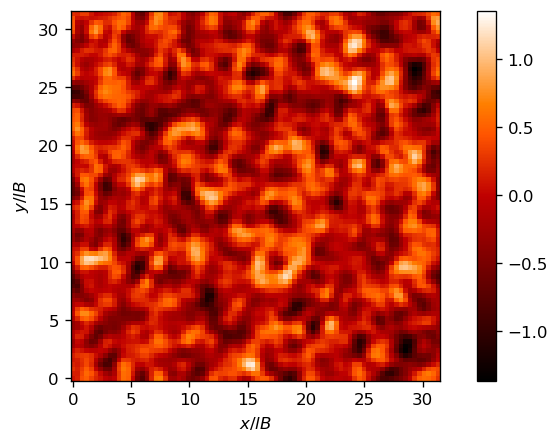

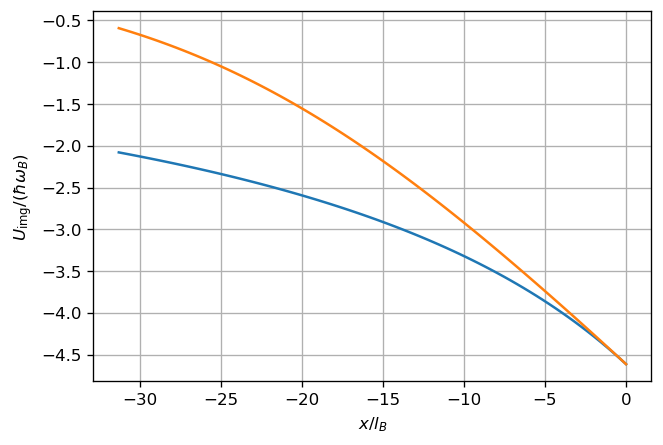

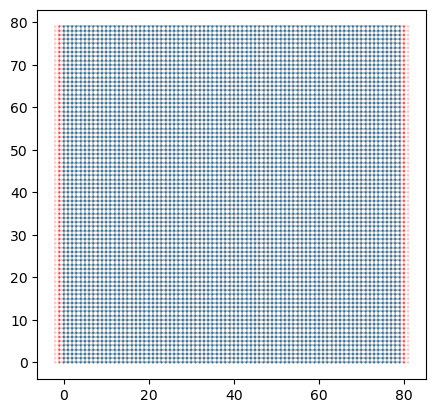

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

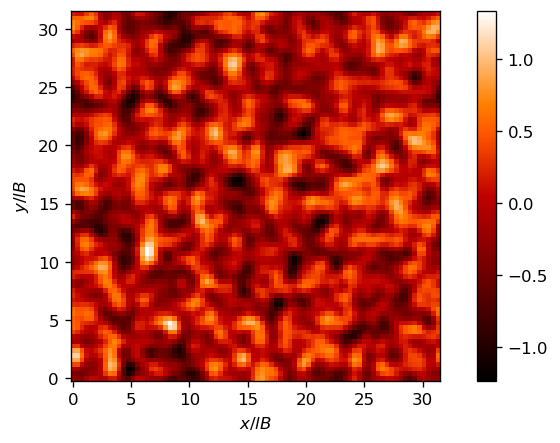

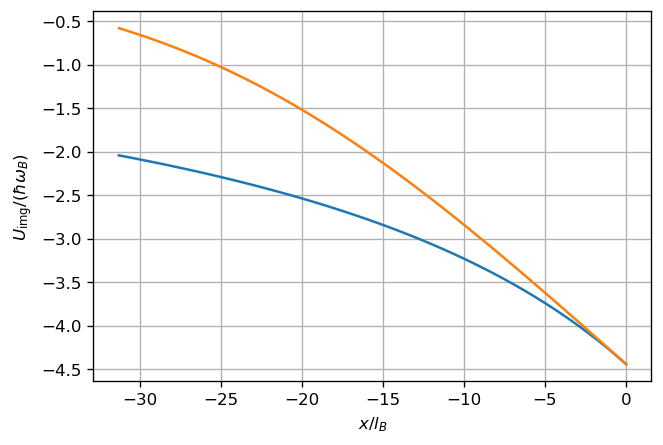

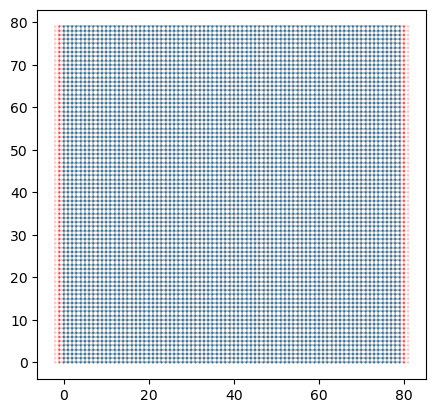

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

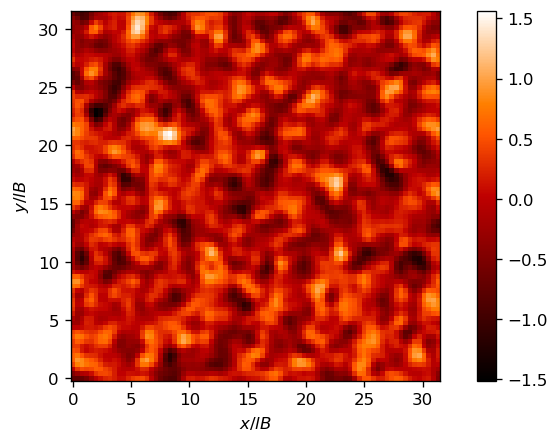

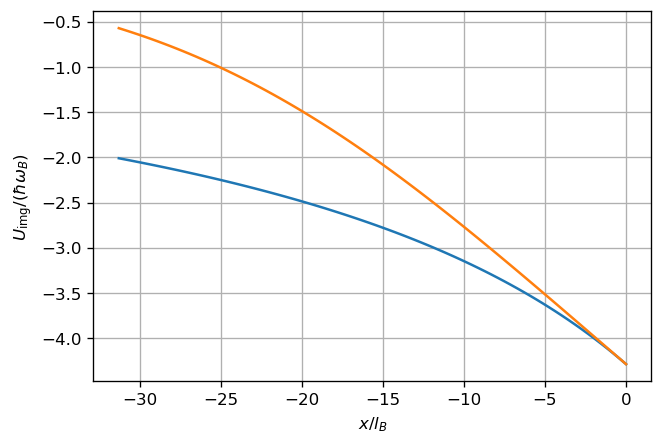

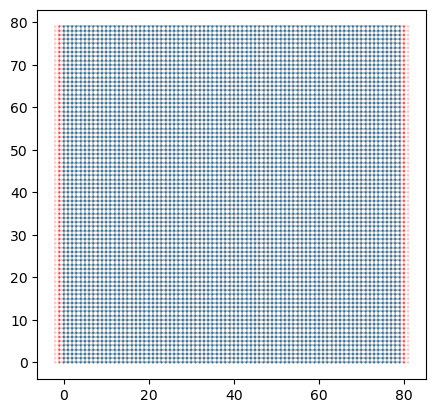

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

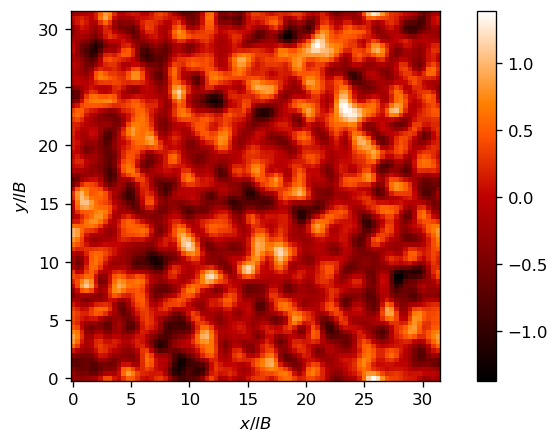

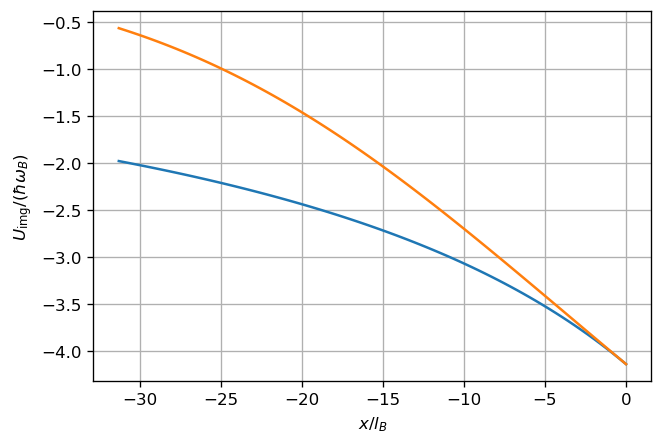

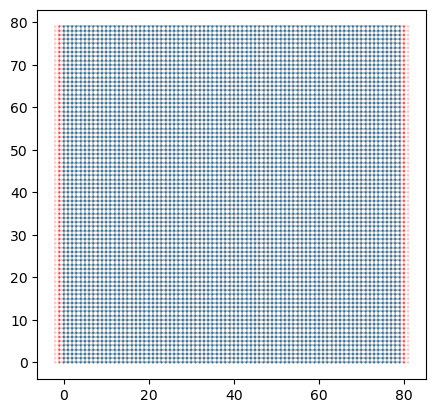

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:117: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_57927/3052623453.py:116: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_5

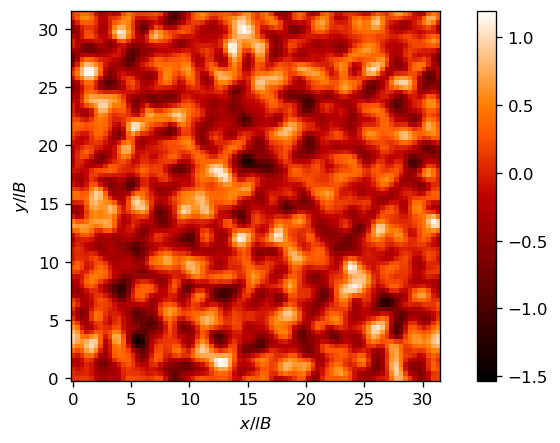

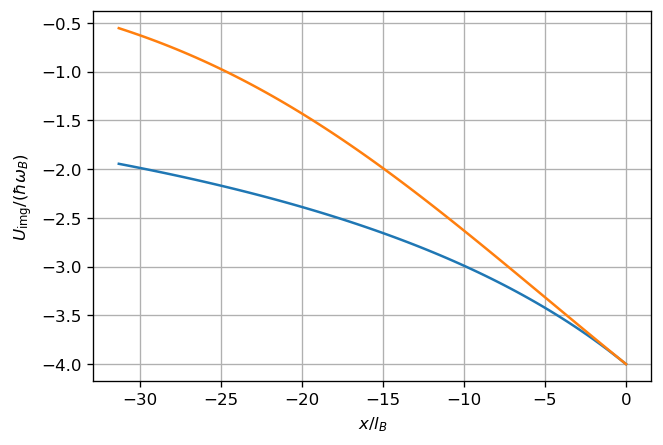

In [3]:
for nG in range(11):

    lat = kwant.lattice.square(a=1, norbs=1)
    Ncore = 6       #number of cores used in the calculation
    iter_dis = 4

    t = 1   # hopping rate for kwant
    L = 80  # spatial width of the system ( Nx )
    W = 80  # spatial length of the system ( Ny )

    # Energy-Length-Magnetic scale (arbitrary) just to have a dimensional reference for the parameters
    #a=0.6 # real lattice spacing in GaAs, in nm
    #BandW0 = 40   #total bandwidth in meV
    #l0 = np.sqrt(568/BandW0*8.) * 10**(-3.) # effective lattice spacing sqrt( \hbar^2/(2m*)/(\hbar J)) here I took \hbar^2/(2m*) = 568 nm^2 meV (GaAs) and \hbar J = BW/8 in micron!
    #B0 = 4.14*10**3. / (l0 * 10**3.)**2. #in T, as 2\pi \hbar/e 1/a^2

    # Adimensional magnetic flux
    alpha = 1/40
    lB = 1./np.sqrt(2*np.pi*alpha)
    omB = 4*np.pi*alpha

    xic = lB * 1      # Correlation length and definition of disorder-potential array
    Vdis = corr_dis(int(L), int(W), 1, xic)

    plate_distance = (20+nG)*lB      #edge-plate distance

    #Vimg = np.linspace(0, W-1, W)/lB
    #E_img = omB * .4         #Image charge amplitude in cyclotrons
    Vimg0 = v_img_singleside(W, int(W), plate_distance)   # normalized image potential single plate
    Vimg1 = v_expcutoff_img_singleside(W, int(W), plate_distance, 20*lB)
    Vimg = Vimg0
    V_img_min = np.amin(Vimg)
    Vimg = Vimg - V_img_min / 1.25
    E_img = omB*lB * ( ( 20 )**2 )/2. * .6         # Image charge amplitude in cyclotrons
    E_dis = omB * (.01 )                   # disorder amplitude in cyclotrons


    # Definitions for Kwant
    def onsite(site, params):
        xi, yi = site.pos
        
        om0 = + 4 * t
        omRan = params.E_dis*params.V[int(yi)][int(xi)]
        omImg = params.E_img * Vimg[int(yi)] 
        
        return  om0 + omRan + omImg

    def hopping(site_i, site_j, params):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
        return - t*np.exp(-1j * 2*np.pi * params.alpha * (xi - xj) * (yi + yj)/2.)

    def onsite_lead(site, params):
        xi, yi = site.pos
        return  4 * t

    def hopping_lead(site_i, site_j, params):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
        return - t

    sys = kwant.Builder()
    sys[(lat(x, y) for x in range(L) for y in range(W))] = onsite
    sys[lat.neighbors()] = hopping

    sym_left_lead = kwant.TranslationalSymmetry((-1, 0))
    left_lead = kwant.Builder(sym_left_lead)
    left_lead[(lat(0, y) for y in range(W))] = onsite_lead
    left_lead[lat.neighbors()] = hopping_lead
    sys.attach_lead(left_lead)
    sys.attach_lead(left_lead.reversed())

    sys = sys.finalized()

    #plot some structural kwant stuff
    kwant.plot(sys);

    xvec = np.linspace(0, L-1, int(L) )
    yvec = np.linspace(0, W-1, int(W) )
    X, Y = np.meshgrid(xvec, yvec)

    fig_W, ax_W = plt.subplots(dpi=120, figsize=(8, 4))
    vmin = 0.
    vmax = 1.000
    Wmap_plot = ax_W.pcolormesh(X/lB, Y/lB, (Vdis.real), cmap='gist_heat', alpha=1)  #, vmin=vmin, vmax=vmax)
    fig_W.colorbar(Wmap_plot)
    ax_W.set_xlabel(r'$x/lB$')
    ax_W.set_ylabel(r'$y/lB$')
    ax_W.set_aspect('equal')


    fig_Img, ax_Img = plt.subplots(dpi=120, figsize=(6, 4))
    ax_Img.plot( -yvec/lB, E_img/omB*(Vimg0) )
    ax_Img.plot( -yvec/lB, E_img/omB*(Vimg1) )
    ax_Img.grid()

    ax_Img.set_xlabel(r'$x/l_B$')
    ax_Img.set_ylabel(r'$U_{\rm img}/(\hbar\omega_B)$')
    #ax_Img.set_aspect('equal')

    ei = 0 * omB   #initial energy in cyclotrons
    ef = 1.5 * omB   #final energy (lowest)
    Ne = 200        #number of points for the conductance sweep

    energies = np.linspace( ei, ef, Ne)  # Define a range of fermi energies to scan
    G0 = np.zeros(Ne)
    GIMG = np.zeros(Ne)
    for ndis in range(iter_dis):
        Vdis = corr_dis(int(L), int(W), 1, xic)
        
        def G_conductance( E_dis, E_img, L, W, alpha, Vdis, Vimg, ne  ):
            energy = ei + (ef-ei)/Ne*ne
            params =SimpleNamespace( alpha=alpha, E_dis=E_dis, E_img=0, V=Vdis, Vimg=Vimg )
            params_img = SimpleNamespace( alpha=alpha, E_dis=E_dis, E_img=E_img, V=Vdis, Vimg=Vimg )

            smat = kwant.smatrix(sys, energy=energy, args=[params])
            smat_img = kwant.smatrix(sys, energy=energy, args=[params_img])
            G0_ne = smat.transmission(0, 1)
            GIMG_ne = smat_img.transmission(0, 1)
            return G0_ne, GIMG_ne


        # Define a function to compute conductance for a single iteration
        def compute_conductance(ne):
            return G_conductance( E_dis, E_img, L, W, alpha, Vdis, Vimg, ne  )

        # Use joblib to parallelize the loop
        results = Parallel(n_jobs=Ncore)(
            delayed(compute_conductance)(ne) for ne in range(Ne)
        )

        shotG0 = []
        shotGIMG = []
        # Aggregate the results
        for sG0, sGIMG in results:
            shotG0.append( sG0 )
            shotGIMG.append( sGIMG )

        shotG0 = np.asarray(shotG0)
        shotGIMG = np.asarray(shotGIMG)
        G0 += shotG0/iter_dis
        GIMG += shotGIMG/iter_dis
        

    # Define a threshold: small fraction of max(fX)
    threshold_shift_IMGT = .0001
    threshold_shift_0T = .0001

    # Find the first index where fX exceeds the threshold
    nonzero_indices_IMGT = np.where(GIMG > threshold_shift_IMGT)[0]
    Eshift_IMG = energies[nonzero_indices_IMGT[0]]

    # Find the first index where fX exceeds the threshold
    nonzero_indices_0T = np.where(G0 > threshold_shift_0T)[0]
    Eshift_0 = energies[nonzero_indices_0T[0]]


    #nG = 0
    # Parameters
    params = {
        "t": t,
        "W": W,
        "L": L,
        "alpha": alpha,
        "xic": xic,
        "plate_distance": plate_distance,
        "E_dis": E_dis,
        "E_img": E_img,
        "ei": ei,
        "ef": ef,
        "Ne": Ne,
        "iter_dis": iter_dis,
        "Ncore": Ncore
    }

    # Create a DataFrame
    data = pd.DataFrame({
        'Energies': energies,
        'G0': G0,
        'GIMG': GIMG
    })

    # Write parameters and data to a file
    filename = 'G_%d.dat' % (nG)
    with open(filename, 'w') as f:
        # Write parameters as comments
        for key, value in params.items():
            f.write(f"# {key} = {value}\n")
        # Write the data
        data.to_csv(f, sep=' ', index=False, header=True)